# Домашняя работа 6. Классификация: деревья и ансамбли

**Студент:** Regina Sadykova

**Датасет:** S06-hw-dataset-01.csv (бинарная классификация с умеренным дисбалансом)

Размер датасета: (12000, 30)
Первые 5 строк:


,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-n

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000



Проверка пропущенных значений:
id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

Распределение целевой переменной 'target':
target
0    8119
1    3881
Name: count, dtype: int64

Доли классов:
target
0    0.676583
1    0.323417
Name: count, dtype: float64


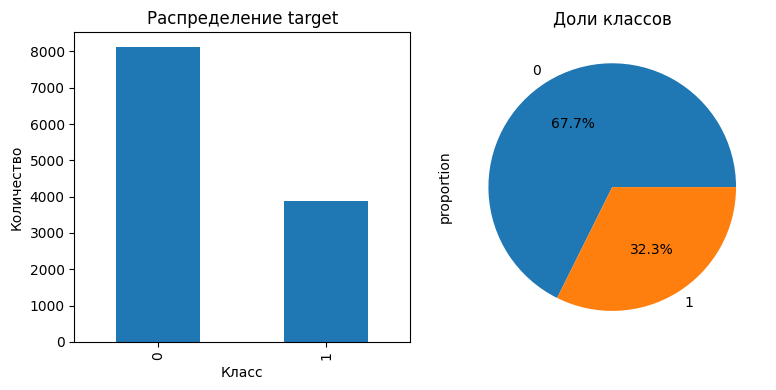


Количество уникальных значений по столбцам:
cat_contract: 3 уникальных значений - [np.int64(0), np.int64(1), np.int64(2)]
cat_region: 5 уникальных значений - [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
cat_payment: 4 уникальных значений - [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
target: 2 уникальных значений - [np.int64(0), np.int64(1)]
Столбец 'id' исключен из признаков
Признаки (X): (12000, 28)
Целевая переменная (y): (12000,)
Названия признаков: ['num01', 'num02', 'num03', 'num04', 'num05', 'num06', 'num07', 'num08', 'num09', 'num10', 'num11', 'num12', 'num13', 'num14', 'num15', 'num16', 'num17', 'num18', 'num19', 'num20', 'num21', 'num22', 'num23', 'num24', 'cat_contract', 'cat_region', 'cat_payment', 'tenure_months']
Размер train: (9000, 28)
Размер test: (3000, 28)

Распределение классов в train:
target
0    0.676556
1    0.323444
Name: proportion, dtype: float64

Распределение классов в test:
target
0    0.676667
1    0.323333
Name: proportion, 

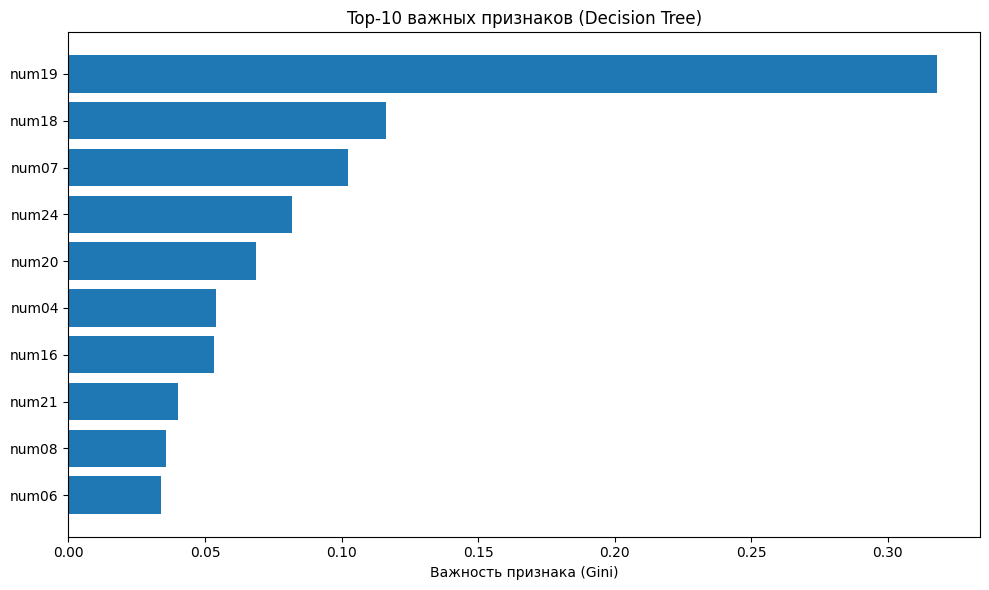

RandomForestClassifier
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warn

In [ ]:

# %%
# 1) Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, 
    precision_recall_curve, auc, classification_report
)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, 
    GradientBoostingClassifier, StackingClassifier
)
from sklearn.inspection import permutation_importance
import joblib
import json
import warnings
warnings.filterwarnings('ignore')

# Для воспроизводимости
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# %%
# 2) Загрузка данных
df = pd.read_csv('/Users/reginasadykova/ai-course2-regina-2025/S06-hw-dataset-01.csv')
print(f"Размер датасета: {df.shape}")

# %%
# 3) Первичный анализ данных
print("Первые 5 строк:")
display(df.head())

print("\nИнформация о датасете:")
print(df.info())

print("\nБазовые статистики числовых признаков:")
display(df.describe())

# Проверка пропусков
print("\nПроверка пропущенных значений:")
print(df.isnull().sum())

# Анализ распределения таргета
print("\nРаспределение целевой переменной 'target':")
target_counts = df['target'].value_counts()
print(target_counts)
print(f"\nДоли классов:")
print(target_counts / len(df))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
target_counts.plot(kind='bar')
plt.title('Распределение target')
plt.xlabel('Класс')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
df['target'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Доли классов')

plt.tight_layout()
plt.savefig('artifacts/figures/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Анализ уникальных значений в каждом столбце
print("\nКоличество уникальных значений по столбцам:")
for col in df.columns:
    unique_count = df[col].nunique()
    if unique_count < 20:  # Выводим только для столбцов с малым числом уникальных значений
        print(f"{col}: {unique_count} уникальных значений - {sorted(df[col].unique())}")

# %%
# 4) Определение X и y
# Исключаем 'target' и 'id' (если есть) из признаков
if 'id' in df.columns:
    X = df.drop(['target', 'id'], axis=1)
    print("Столбец 'id' исключен из признаков")
else:
    X = df.drop('target', axis=1)

y = df['target']

print(f"Признаки (X): {X.shape}")
print(f"Целевая переменная (y): {y.shape}")
print(f"Названия признаков: {list(X.columns)}")

# %% [markdown]
# ## 2.3.2. Train/Test-сплит и воспроизводимость

# %%
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=RANDOM_STATE, 
    stratify=y  # Стратификация для сохранения пропорций классов
)

print(f"Размер train: {X_train.shape}")
print(f"Размер test: {X_test.shape}")
print(f"\nРаспределение классов в train:")
print(y_train.value_counts(normalize=True))
print(f"\nРаспределение классов в test:")
print(y_test.value_counts(normalize=True))

# %% [markdown]
# **Пояснение:**
# - `random_state=42` обеспечивает воспроизводимость результатов: при каждом запуске разделение будет одинаковым
# - `stratify=y` сохраняет пропорции классов в train и test выборках, что особенно важно при дисбалансе
# - Без стратификации в test может оказаться непропорционально много/мало примеров миноритарного класса

# %% [markdown]
# ## 2.3.3. Baseline'ы

# %%
# Функция для вычисления метрик
def calculate_metrics(y_true, y_pred, y_pred_proba=None, model_name=""):
    """Вычисление метрик для классификации"""
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred, average='binary')
    }
    
    if y_pred_proba is not None and len(np.unique(y_true)) == 2:
        metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba)
    
    print(f"\nМетрики для {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    return metrics

# %%
# 1) DummyClassifier (baseline)
print("=" * 50)
print("DummyClassifier Baseline")
print("=" * 50)

dummy_clf = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
y_pred_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1] if hasattr(dummy_clf, 'predict_proba') else None

metrics_dummy = calculate_metrics(y_test, y_pred_dummy, y_pred_proba_dummy, "DummyClassifier")

# %%
# 2) LogisticRegression (baseline)
print("=" * 50)
print("LogisticRegression Baseline")
print("=" * 50)

# Создаем pipeline с StandardScaler
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

metrics_lr = calculate_metrics(y_test, y_pred_lr, y_pred_proba_lr, "LogisticRegression")

# %% [markdown]
# **Интерпретация baseline'ов:**
# - DummyClassifier (most_frequent) всегда предсказывает наиболее частый класс
# - LogisticRegression показывает, насколько линейная модель справляется с данными
# - Разница в метриках между ними показывает потенциал для улучшения

# %% [markdown]
# ## 2.3.4. Модели недели 6

# %% [markdown]
# ### 1. DecisionTreeClassifier с контролем сложности

# %%
print("=" * 50)
print("DecisionTreeClassifier")
print("=" * 50)

# Настройка гиперпараметров через GridSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid_dt = GridSearchCV(
    dt, param_grid_dt, 
    cv=cv, 
    scoring='roc_auc',  # Для бинарной классификации используем ROC-AUC
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_dt.best_params_}")
print(f"Лучший ROC-AUC на CV: {grid_dt.best_score_:.4f}")

# Оценка на test
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]

metrics_dt = calculate_metrics(y_test, y_pred_dt, y_pred_proba_dt, "DecisionTreeClassifier")

# Визуализация важности признаков для дерева
importances_dt = best_dt.feature_importances_
indices_dt = np.argsort(importances_dt)[-10:]  # Топ-10 признаков

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices_dt)), importances_dt[indices_dt])
plt.yticks(range(len(indices_dt)), [X.columns[i] for i in indices_dt])
plt.xlabel('Важность признака (Gini)')
plt.title('Top-10 важных признаков (Decision Tree)')
plt.tight_layout()
plt.savefig('artifacts/figures/dt_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 2. RandomForestClassifier

# %%
print("=" * 50)
print("RandomForestClassifier")
print("=" * 50)

# Упрощенный GridSearch для демонстрации
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

grid_rf = GridSearchCV(
    rf, param_grid_rf,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_rf.best_params_}")
print(f"Лучший ROC-AUC на CV: {grid_rf.best_score_:.4f}")

# Оценка на test
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

metrics_rf = calculate_metrics(y_test, y_pred_rf, y_pred_proba_rf, "RandomForestClassifier")

# Визуализация важности признаков
importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[-15:]  # Топ-15 признаков

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices_rf)), importances_rf[indices_rf])
plt.yticks(range(len(indices_rf)), [X.columns[i] for i in indices_rf])
plt.xlabel('Важность признака (Gini)')
plt.title('Top-15 важных признаков (Random Forest)')
plt.tight_layout()
plt.savefig('artifacts/figures/rf_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 3. GradientBoostingClassifier

# %%
print("=" * 50)
print("GradientBoostingClassifier")
print("=" * 50)

# Упрощенный GridSearch для GBM
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingClassifier(random_state=RANDOM_STATE)

grid_gb = GridSearchCV(
    gb, param_grid_gb,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_gb.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_gb.best_params_}")
print(f"Лучший ROC-AUC на CV: {grid_gb.best_score_:.4f}")

# Оценка на test
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
y_pred_proba_gb = best_gb.predict_proba(X_test)[:, 1]

metrics_gb = calculate_metrics(y_test, y_pred_gb, y_pred_proba_gb, "GradientBoostingClassifier")

# %% [markdown]
# ### 4. StackingClassifier (опционально)

# %%
print("=" * 50)
print("StackingClassifier")
print("=" * 50)

# Базовые модели для стекинга
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE, n_jobs=-1)),
    ('gb', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=RANDOM_STATE))
]

# Мета-модель (финальный классификатор)
meta_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)

# Создаем StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Обучаем на train
stacking_clf.fit(X_train, y_train)

# Оценка на test
y_pred_stack = stacking_clf.predict(X_test)
y_pred_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

metrics_stack = calculate_metrics(y_test, y_pred_stack, y_pred_proba_stack, "StackingClassifier")

# %% [markdown]
# ## 2.3.5. Метрики качества и диагностические графики

# %%
# Сбор всех метрик для сравнения
all_metrics = {
    'Dummy': metrics_dummy,
    'LogisticRegression': metrics_lr,
    'DecisionTree': metrics_dt,
    'RandomForest': metrics_rf,
    'GradientBoosting': metrics_gb,
    'Stacking': metrics_stack
}

# Создаем DataFrame для сравнения метрик
metrics_df = pd.DataFrame(all_metrics).T
print("\n" + "=" * 50)
print("Сравнение метрик всех моделей на test:")
print("=" * 50)
display(metrics_df)

# Сохраняем метрики в artifacts
metrics_df.to_csv('artifacts/metrics_test.csv')
metrics_df.to_json('artifacts/metrics_test.json', indent=2)

# %%
# Сохраняем информацию о лучших параметрах
search_summaries = {
    'DecisionTree': {
        'best_params': grid_dt.best_params_,
        'best_cv_score': grid_dt.best_score_
    },
    'RandomForest': {
        'best_params': grid_rf.best_params_,
        'best_cv_score': grid_rf.best_score_
    },
    'GradientBoosting': {
        'best_params': grid_gb.best_params_,
        'best_cv_score': grid_gb.best_score_
    }
}

with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=2)

print("Информация о подборе гиперпараметров сохранена в artifacts/search_summaries.json")

# %%
# Визуализация: ROC-кривые для всех моделей (кроме Dummy, если нет вероятностей)
plt.figure(figsize=(10, 8))

models_to_plot = [
    ('LogisticRegression', y_pred_proba_lr, 'blue'),
    ('DecisionTree', y_pred_proba_dt, 'green'),
    ('RandomForest', y_pred_proba_rf, 'red'),
    ('GradientBoosting', y_pred_proba_gb, 'purple'),
    ('Stacking', y_pred_proba_stack, 'orange')
]

for model_name, y_pred_proba, color in models_to_plot:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, color=color, lw=2, 
             label=f'{model_name} (AUC = {roc_auc:.3f})')

# Случайный классификатор
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для всех моделей')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('artifacts/figures/roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()

# %%
# Confusion Matrix для лучшей модели (по ROC-AUC)
best_model_name = metrics_df['roc_auc'].idxmax()
print(f"\nЛучшая модель по ROC-AUC: {best_model_name}")

# В зависимости от лучшей модели, выбираем предсказания
if best_model_name == 'LogisticRegression':
    y_pred_best = y_pred_lr
elif best_model_name == 'DecisionTree':
    y_pred_best = y_pred_dt
elif best_model_name == 'RandomForest':
    y_pred_best = y_pred_rf
elif best_model_name == 'GradientBoosting':
    y_pred_best = y_pred_gb
elif best_model_name == 'Stacking':
    y_pred_best = y_pred_stack
else:
    y_pred_best = y_pred_lr  # fallback

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix для {best_model_name}')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.savefig('artifacts/figures/best_model_confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# %%
# Precision-Recall кривая (полезно при дисбалансе)
plt.figure(figsize=(10, 8))

for model_name, y_pred_proba, color in models_to_plot:
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2,
             label=f'{model_name} (PR-AUC = {pr_auc:.3f})')

# Baseline для PR-кривой (доля положительного класса)
positive_ratio = y_test.mean()
plt.plot([0, 1], [positive_ratio, positive_ratio], 'k--', lw=2,
         label=f'Baseline (Positive ratio = {positive_ratio:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривые')
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('artifacts/figures/pr_curves.png', dpi=150, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 2.3.6. Интерпретация (Permutation Importance)

# %%
print("=" * 50)
print(f"Permutation Importance для лучшей модели ({best_model_name})")
print("=" * 50)

# Выбираем лучшую модель для вычисления permutation importance
if best_model_name == 'LogisticRegression':
    best_model = lr_pipeline
elif best_model_name == 'DecisionTree':
    best_model = best_dt
elif best_model_name == 'RandomForest':
    best_model = best_rf
elif best_model_name == 'GradientBoosting':
    best_model = best_gb
elif best_model_name == 'Stacking':
    best_model = stacking_clf

# Вычисляем permutation importance
result = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    scoring='roc_auc'
)

# Сортируем признаки по важности
sorted_idx = result.importances_mean.argsort()[::-1]

# Визуализация топ-15 признаков
top_n = min(15, len(X.columns))
plt.figure(figsize=(12, 8))

plt.boxplot(
    result.importances[sorted_idx[:top_n]].T,
    vert=False,
    labels=[X.columns[i] for i in sorted_idx[:top_n]]
)

plt.title(f"Permutation Importance (топ-{top_n} признаков) - {best_model_name}")
plt.xlabel("Уменьшение ROC-AUC после перестановки")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('artifacts/figures/permutation_importance.png', dpi=150, bbox_inches='tight')
plt.show()

# Вывод топ-признаков
print(f"\nТоп-{top_n} признаков по permutation importance:")
for i in range(top_n):
    idx = sorted_idx[i]
    print(f"{i+1:2}. {X.columns[idx]:30} "
          f"mean: {result.importances_mean[idx]:.4f} ± {result.importances_std[idx]:.4f}")

# %% [markdown]
# **Интерпретация permutation importance:**
# - Признаки с наибольшим значением mean наиболее важны для модели
# - Большой разброс (std) может указывать на нестабильность важности признака
# - Сравните с feature_importances_ из деревьев для проверки согласованности

# %% [markdown]
# ## Сохранение лучшей модели и метаданных

# %%
# Сохраняем лучшую модель
model_filename = 'artifacts/best_model.joblib'
joblib.dump(best_model, model_filename)
print(f"Лучшая модель сохранена как: {model_filename}")

# Создаем метаданные
best_model_meta = {
    'best_model_name': best_model_name,
    'best_model_roc_auc': float(metrics_df.loc[best_model_name, 'roc_auc']),
    'best_model_f1': float(metrics_df.loc[best_model_name, 'f1']),
    'best_model_accuracy': float(metrics_df.loc[best_model_name, 'accuracy']),
    'test_set_size': len(X_test),
    'train_set_size': len(X_train),
    'random_state': RANDOM_STATE,
    'timestamp': pd.Timestamp.now().isoformat()
}

# Добавляем параметры, если модель была настроена через GridSearch
if best_model_name in search_summaries:
    best_model_meta['best_params'] = search_summaries[best_model_name]['best_params']
    best_model_meta['best_cv_score'] = float(search_summaries[best_model_name]['best_cv_score'])

# Сохраняем метаданные
with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_model_meta, f, indent=2)

print(f"Метаданные сохранены в: artifacts/best_model_meta.json")
print("\nСодержимое метаданных:")
print(json.dumps(best_model_meta, indent=2))

# %% [markdown]
# ## Выводы и заключение

# %%
print("=" * 50)
print("ОСНОВНЫЕ ВЫВОДЫ")
print("=" * 50)

print(f"1. Лучшая модель: {best_model_name}")
print(f"   - ROC-AUC: {best_model_meta['best_model_roc_auc']:.4f}")
print(f"   - F1-score: {best_model_meta['best_model_f1']:.4f}")
print(f"   - Accuracy: {best_model_meta['best_model_accuracy']:.4f}")

print(f"\n2. Сравнение с baseline:")
print(f"   - Dummy accuracy: {metrics_dummy['accuracy']:.4f}")
print(f"   - Улучшение accuracy: {best_model_meta['best_model_accuracy'] - metrics_dummy['accuracy']:.4f}")

print(f"\n3. Топ-3 важных признака по permutation importance:")
for i in range(min(3, top_n)):
    idx = sorted_idx[i]
    print(f"   {i+1}. {X.columns[idx]}")

print(f"\n4. Особенности датасета:")
print(f"   - Размер: {df.shape}")
print(f"   - Доля положительного класса: {y.mean():.3f}")
print(f"   - Тип задачи: бинарная классификация с умеренным дисбалансом")

# %% [markdown]
# **Рекомендации для улучшения:**
# 1. Попробовать более глубокий поиск гиперпараметров
# 2. Рассмотреть методы борьбы с дисбалансом (например, class_weight, SMOTE)
# 3. Проанализировать наиболее важные признаки предметно
# 4. Попробовать другие ансамблевые методы (XGBoost, LightGBM, CatBoost)